# Time to Sleep Model Multiple Files
Looking at the settling period aggregated.

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import run_yasa
import logging
import mne
import yasa
import os
import argparse
import os

import mne
import numpy as np
import pandas as pd
from brainflow.board_shim import BoardShim, BoardIds
from brainflow.data_filter import DataFilter
log = lambda msg: logging.info(msg)


# Load data

In [2]:
input_dir = "C:\\dev\\play\\brainwave-data"
stats_df = pd.read_csv(input_dir + os.path.sep + "stats.csv")


In [3]:

from sleep_events import connect_to_firebase


# def load_sleep_events(log, start_date, end_date, waking_start_time_tz, waking_end_time_tz):
db = connect_to_firebase()

docs = db.collection('nightsExperimental').stream()

# Convert to list of dictionaries
records = [doc.to_dict() for doc in docs]

nights = pd.DataFrame(records)
nights

,aggregated,dayAndNightOf,userOverrides,morningQuestionnaire,yasaExtended,sleepQuestionnaires,fitbit,nightEvents,yasa
0,{'hypnogram': [{'endTime': 2024-04-30 00:54:30...,2024-04-29,"{'asleepTime': 2024-04-30 00:12:00+00:00, 'rea...",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'timeAwakeAfterSleepMillis': 0, 'hypnogram': ...",2024-04-30,{'readyToSleepTime': 2024-04-30 23:06:48.95600...,NaN,NaN,NaN,NaN,NaN,NaN
2,{'hypnogram': [{'startTime': 2024-05-01 23:06:...,2024-05-01,{'readyToSleepTime': 2024-05-01 23:02:11.88900...,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'timeAwakeAfterSleepMillis': 750000, 'hypnogr...",2024-05-02,{'readyToSleepTime': 2024-05-03 00:19:20.51100...,NaN,NaN,NaN,NaN,NaN,NaN
4,{'peesAfterReadyToSleep': [2024-05-03 23:56:14...,2024-05-03,{'readyToSleepTime': 2024-05-03 23:06:34.84600...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
133,NaN,2024-09-30,"{'wakeTime': 2024-10-01 05:23:00+00:00, 'aslee...","{'co2': {'comments': '', 'standardSetup': 'Uns...",NaN,NaN,NaN,NaN,NaN
134,NaN,2024-10-01,{'readyToSleepTime': 2024-10-01 21:20:00+00:00...,"{'disturbances': {'Cat': {'insomnia': 'No', 'd...",NaN,NaN,NaN,NaN,NaN
135,NaN,2024-10-02,{'asleepTime': 2024-10-02 21:26:49.925000+00:0...,"{'co2': {'standardSetup': 'Unset', 'comments':...",NaN,NaN,NaN,NaN,NaN
136,NaN,2024-10-05,{'readyToSleepTime': 2024-10-05 21:09:30+00:00...,{'disturbances': {'Too cold': {'insomnia': 'No...,NaN,NaN,NaN,NaN,NaN


In [4]:
nights['wakeTime'] = pd.to_datetime(nights['userOverrides'].apply(lambda x: x.get('wakeTime') if isinstance(x, dict) else None))
nights['asleepTime'] = pd.to_datetime(nights['userOverrides'].apply(lambda x: x.get('asleepTime') if isinstance(x, dict) else None))
nights['readyToSleepTime'] = pd.to_datetime(nights['userOverrides'].apply(lambda x: x.get('readyToSleepTime') if isinstance(x, dict) else None))
nights

,aggregated,dayAndNightOf,userOverrides,morningQuestionnaire,yasaExtended,sleepQuestionnaires,fitbit,nightEvents,yasa,wakeTime,asleepTime,readyToSleepTime
0,{'hypnogram': [{'endTime': 2024-04-30 00:54:30...,2024-04-29,"{'asleepTime': 2024-04-30 00:12:00+00:00, 'rea...",NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30 06:53:00+00:00,2024-04-30 00:12:00+00:00,2024-04-29 23:49:46.885000+00:00
1,"{'timeAwakeAfterSleepMillis': 0, 'hypnogram': ...",2024-04-30,{'readyToSleepTime': 2024-04-30 23:06:48.95600...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 06:34:00+00:00,2024-04-30 23:11:00+00:00,2024-04-30 23:06:48.956000+00:00
2,{'hypnogram': [{'startTime': 2024-05-01 23:06:...,2024-05-01,{'readyToSleepTime': 2024-05-01 23:02:11.88900...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-02 07:00:00+00:00,2024-05-01 23:06:00+00:00,2024-05-01 23:02:11.889000+00:00
3,"{'timeAwakeAfterSleepMillis': 750000, 'hypnogr...",2024-05-02,{'readyToSleepTime': 2024-05-03 00:19:20.51100...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03 05:52:30+00:00,2024-05-03 00:24:00+00:00,2024-05-03 00:19:20.511000+00:00
4,{'peesAfterReadyToSleep': [2024-05-03 23:56:14...,2024-05-03,{'readyToSleepTime': 2024-05-03 23:06:34.84600...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-04 07:19:20.753000+00:00,2024-05-03 23:06:00+00:00,2024-05-03 23:06:34.846000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,2024-09-30,"{'wakeTime': 2024-10-01 05:23:00+00:00, 'aslee...","{'co2': {'comments': '', 'standardSetup': 'Uns...",NaN,NaN,NaN,NaN,NaN,2024-10-01 05:23:00+00:00,2024-09-30 21:40:19+00:00,2024-09-30 21:24:30+00:00
134,NaN,2024-10-01,{'readyToSleepTime': 2024-10-01 21:20:00+00:00...,"{'disturbances': {'Cat': {'insomnia': 'No', 'd...",NaN,NaN,NaN,NaN,NaN,2024-10-02 05:05:41+00:00,2024-10-01 22:15:41+00:00,2024-10-01 21:20:00+00:00
135,NaN,2024-10-02,{'asleepTime': 2024-10-02 21:26:49.925000+00:0...,"{'co2': {'standardSetup': 'Unset', 'comments':...",NaN,NaN,NaN,NaN,NaN,2024-10-03 05:25:00+00:00,2024-10-02 21:26:49.925000+00:00,2024-10-02 21:17:00+00:00
136,NaN,2024-10-05,{'readyToSleepTime': 2024-10-05 21:09:30+00:00...,{'disturbances': {'Too cold': {'insomnia': 'No...,NaN,NaN,NaN,NaN,NaN,2024-10-06 05:14:00+00:00,2024-10-05 21:15:46.500000+00:00,2024-10-05 21:09:30+00:00


In [5]:
from sleep_events import load_days_data

days_data = load_days_data()


In [6]:
from datetime import datetime
import run_feature_pipeline

# dir_name = "2024-09-05-21-32-05"
# input_file = os.path.join(input_dir, dir_name, "raw.fif")

def get_sleep_time(dir_name):
    return get_time(dir_name, 'asleepTime')

def get_ready_to_sleep_time(dir_name):
    return get_time(dir_name, 'readyToSleepTime')

def get_time(dir_name, col):
    day_and_night_of_date = datetime.strptime(dir_name, "%Y-%m-%d-%H-%M-%S")
    day_and_night_of = day_and_night_of_date.date().isoformat()
    night_row = nights[nights['dayAndNightOf'] == day_and_night_of]
    asleepTime = pd.Timestamp(night_row[col].values[0])
    return asleepTime

#day_and_night_of_date.date()



KeyboardInterrupt



In [ ]:
from datetime import timedelta


def add_time_to_sleep(asleepTime, readyToSleepTime, yasa_df):
    timezone = asleepTime.tzinfo

    day_and_night_of_date = datetime.strptime(dir_name, "%Y-%m-%d-%H-%M-%S")
    day_and_night_of = day_and_night_of_date.date().isoformat()
    day_and_night_of_date_next_day = day_and_night_of_date + timedelta(days=1)
    day_and_night_of_date_next_day_str = day_and_night_of_date_next_day.date().isoformat()

    row = days_data[days_data['dayAndNightOf'] == day_and_night_of]
    #row_next_day = days_data[days_data['dayAndNightOf'] == day_and_night_of_date_next_day_str]
    
    yasa_df['Timestamp'] = pd.to_datetime(yasa_df['Timestamp']).dt.tz_localize(timezone)
    yasa_df['TimeToSleep'] = asleepTime - yasa_df['Timestamp']
    yasa_df['TimeToSleepMins'] = yasa_df['TimeToSleep'].dt.total_seconds() / 60
    yasa_df['TimeToReadyToSleep'] = readyToSleepTime - yasa_df['Timestamp']
    yasa_df['TimeToReadyToSleepMins'] = yasa_df['TimeToReadyToSleep'].dt.total_seconds() / 60


In [ ]:
from datetime import datetime
import os
import run_feature_pipeline
errors = []

dfs = []
# Could get these working later
skip_list = ['2024-07-23-22-40-25', '2024-07-28-22-29-49', '2024-09-18-21-25-08', '2024-09-18-21-28-11', '2024-09-19-21-29-42']


for root, dirs, files in os.walk(input_dir):
    for idx, dir_name in enumerate(dirs):
        input_file = os.path.join(root, dir_name, "raw.fif")
        if dir_name in skip_list:
            log(f"Skipping {idx} of {len(dirs)}: " + input_file)
            continue
        try:
            log("Processing file: " + input_file)
            if os.path.exists(input_file):
                day_and_night_of_date = datetime.strptime(dir_name, "%Y-%m-%d-%H-%M-%S")
                day_and_night_of = day_and_night_of_date.date().isoformat()
                asleep_time = get_sleep_time(dir_name)
                ready_to_sleep_time = get_ready_to_sleep_time(dir_name)
                yasa_df = run_feature_pipeline.cached_pipeline(log, input_file, stats_df)
                yasa_df['dayAndNightOf'] = day_and_night_of
                yasa_df['DayAndNightOf'] = day_and_night_of
                add_time_to_sleep(asleep_time, ready_to_sleep_time, yasa_df)
                dfs.append(yasa_df)
        except Exception as e:
            log("Error processing file: " + input_file)
            errors.append("Error processing file: " + input_file + " - " + str(e))
            log(e)

for err in errors:
    log(err)
    
yasa_df = pd.concat(dfs)

In [ ]:
errors

In [ ]:



filtered_df = yasa_df[yasa_df['TimeToReadyToSleepMins'] <= 30]

cols_to_drop = [col for col in yasa_df.columns if ('eeg' in col and 'Main' not in col) or 'Confidence' in col or 'TimeTo' in col or 'Epoch' in col or 'StageInt' in col]
dropped_df = filtered_df.drop(columns=cols_to_drop)

# Select only numeric columns
numeric_cols = dropped_df.select_dtypes(include=[np.number]).columns

# Include 'DayAndNightOf' in the grouping
numeric_cols = numeric_cols.tolist() + ['DayAndNightOf']

# Group by 'DayAndNightOf' and take the average of each numeric column
grouped_avg_df = dropped_df[numeric_cols].groupby('DayAndNightOf').mean().reset_index()

grouped_avg_df

In [ ]:
days_data['DayAndNightOf'] = days_data['dayAndNightOf']

In [ ]:
merged = pd.merge(grouped_avg_df, days_data, on='DayAndNightOf', how='left')

In [ ]:
merged.shape

In [ ]:
[col for col in merged.columns if 'energy' in col or 'GotIntoBed' in col or 'betweenGotIntoBedAndReadyToSleepSecs' in col]


# Prepare data

In [63]:
from dataclasses import dataclass
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
import pandas as pd
import json

# target_cols = ["TimeToSleepMins", "TimeToReadyToSleepMins"]


class RowSelector(BaseEstimator, TransformerMixin):
    def __init__(self, target_col: str, sources: list[str], min_value):
        self.target_col = target_col
        self.sources = sources
        self.min_value = min_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X = X[~X[self.target_col].isna()]
        if self.min_value is not None:
            X = X[X[self.target_col] <= self.min_value]
        return X


class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, target_col: str, sources: list[str]):
        self.target_col = target_col
        self.sources = sources
    
    def fit(self, X, y=None):
        self.columns_to_keep = [self.target_col]
        if "eeg_realtime" in self.sources:
            self.columns_to_keep.extend([col for col in X.columns if "Main_" in col and "eeg" in col and not ("_p2" in col or "_c7" in col)])
        return self

    def transform(self, X):
        return X[self.columns_to_keep]



@dataclass
class ModelAndData:
    name: str
    target_col: str
    sources: list[str]
    prepared_df: pd.DataFrame
    X: pd.DataFrame
    y: pd.Series
    model: object = None
    X_train: pd.DataFrame = None
    y_train: pd.Series = None
    X_val: pd.DataFrame = None
    y_val: pd.Series = None
    

modelsAndData: list[ModelAndData] = []

def create_and_add(target_col: str, sources: list[str], input):
    name = f"target:{target_col} sources:{sources}"

    pipeline = Pipeline([
        ('feature_selector', FeatureSelector(target_col, sources)),
        ('row_selector', RowSelector(target_col, sources, None)),
    ])

    prepared_df = pipeline.fit_transform(input)

    X = prepared_df.drop(columns=[target_col])
    y = prepared_df[target_col]

    md = ModelAndData(name, target_col, sources, prepared_df, X, y)
    modelsAndData.append(md)


create_and_add("night:aggregated:betweenGotIntoBedAndReadyToSleepSecs", ["eeg_realtime"], merged)

In [64]:
modelsAndData[0].prepared_df

,night:aggregated:betweenGotIntoBedAndReadyToSleepSecs,Main_eeg_abspow_s,Main_eeg_alpha_s,Main_eeg_at_s,Main_eeg_auc_s,Main_eeg_beta_s,Main_eeg_db_s,Main_eeg_ds_s,Main_eeg_dt_s,Main_eeg_fdelta_s,...,Main_eeg_perm_s,Main_eeg_perment_s,Main_eeg_petrosian_s,Main_eeg_sdelta_s,Main_eeg_sigma_s,Main_eeg_skew_s,Main_eeg_specent_s,Main_eeg_std_s,Main_eeg_svdent_s,Main_eeg_theta_s
14,2873.0,0.456311,0.495154,0.501505,0.422666,0.393414,0.228521,0.259117,0.346465,0.542755,...,0.390883,9.720758,0.370868,0.436517,0.476763,0.523668,2.840575,0.412826,27.648040,0.504127
15,3882.0,216.186486,0.344856,0.533942,1.229549,0.516548,0.307922,0.372569,0.493845,0.350482,...,0.599605,10.284401,0.592716,0.623910,0.338660,0.579306,2.833170,1.422707,21.495420,0.356882
16,2970.0,739.190961,0.710072,0.442130,3.296164,0.607567,1.663707,1.664170,0.600366,0.402808,...,0.458138,10.016252,0.453198,0.281720,0.628922,0.619994,3.079654,3.876045,21.528643,0.875546
17,4911.0,203.696613,0.466499,0.455721,1.928556,0.297374,0.522294,0.478389,0.364841,0.580434,...,0.360905,9.844552,0.346733,0.437858,0.354995,0.606973,2.645124,2.121411,17.622791,0.532992
18,4139.0,0.360451,0.440626,0.452851,0.376019,0.267964,0.341577,0.318221,0.302274,0.610002,...,0.326989,9.684465,0.315846,0.441994,0.323064,0.607470,2.624016,0.498862,22.941456,0.503781
19,1583.0,0.611397,0.549291,0.637528,0.495318,0.457518,0.249284,0.313276,0.428776,0.485804,...,0.389260,9.686499,0.370020,0.449379,0.516867,0.542457,2.881096,0.467064,27.652922,0.499039
20,2431.0,34.557293,0.381457,0.387443,1.003018,0.330666,0.468168,0.500417,0.425133,0.606497,...,0.517576,9.978296,0.509039,0.455503,0.339375,0.407982,2.664168,1.162252,23.759867,0.475966
21,3263.0,582.132707,0.488240,0.518572,2.598190,0.600053,0.511882,0.550354,0.447616,0.483690,...,0.400580,9.785885,0.390180,0.439935,0.482697,0.541726,2.899459,2.429949,20.129290,0.503133
22,2862.0,0.670816,0.534415,0.600249,0.468022,0.427339,0.197224,0.279135,0.335020,0.500344,...,0.672871,9.646457,0.647717,0.452104,0.432285,0.654903,2.744102,0.564981,27.342440,0.504046
23,2576.0,100.171653,0.626135,0.705048,1.149636,0.640794,0.253567,0.277810,0.377785,0.453809,...,0.499052,9.718238,0.478875,0.396964,0.598749,0.595024,2.842376,1.273678,19.743917,0.503018


In [65]:
from sklearn.model_selection import train_test_split

def split(modelAndData: ModelAndData):
    X_train_to_sleep, X_val_to_sleep, y_train_to_sleep, y_val_to_sleep = train_test_split(modelAndData.X, modelAndData.y, test_size=0.2, random_state=42)
    modelAndData.X_train = X_train_to_sleep
    modelAndData.y_train = y_train_to_sleep
    modelAndData.X_val = X_val_to_sleep
    modelAndData.y_val = y_val_to_sleep

for md in modelsAndData:
    split(md)
    print(f"Training set size {md.name}: {len(md.X_train)}, validation set size: {len(md.X_val)}")

Training set size target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime']: 20, validation set size: 6


In [ ]:
# modelsAndData['time_to_ready_to_sleep_eeg_realtime_only'].X_train

# Train Catboost model

In [66]:
from catboost import CatBoostRegressor

def train(md: ModelAndData):
    md.model = CatBoostRegressor(
        eval_metric='RMSE',             # Root Mean Squared Error
        loss_function='RMSE',           # Loss function for regression
        iterations=1000,                # Number of boosting iterations
        learning_rate=0.03,             # Learning rate
        depth=6,                        # Depth of the tree
        l2_leaf_reg=3,                  # L2 regularization term on weights
        early_stopping_rounds=50        # Early stopping rounds
    )

    log(f"Training model for {md}")
    md.model.fit(md.X_train, md.y_train, verbose=100)

for md in modelsAndData:
    train(md)

0:	learn: 2494.5517334	total: 151ms	remaining: 2m 31s
100:	learn: 1130.7821819	total: 225ms	remaining: 2s
200:	learn: 554.3698315	total: 299ms	remaining: 1.19s
300:	learn: 261.5331597	total: 372ms	remaining: 863ms
400:	learn: 119.6054500	total: 450ms	remaining: 672ms
500:	learn: 56.7533738	total: 556ms	remaining: 553ms
600:	learn: 27.2257580	total: 641ms	remaining: 425ms
700:	learn: 12.9629320	total: 729ms	remaining: 311ms
800:	learn: 6.2280149	total: 813ms	remaining: 202ms
900:	learn: 3.0815518	total: 900ms	remaining: 98.9ms
999:	learn: 1.4542014	total: 991ms	remaining: 0us


# Evaluate the model

Evaluation for model:  target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime']
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Training Set Evaluation:
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Mean Absolute Error (MAE): 1.2522020894141632
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Mean Squared Error (MSE): 2.1147015802253213
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Root Mean Squared Error (RMSE): 1.454201354773582
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Validation Set Evaluation:
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Mean Absolute Error (MAE): 1146.2385195799027
target:night:aggregated:betweenGotIntoBedAndReadyToSleepSecs sources:['eeg_realtime'] Mean Squared Error (MSE): 1705924.4855604284
targe

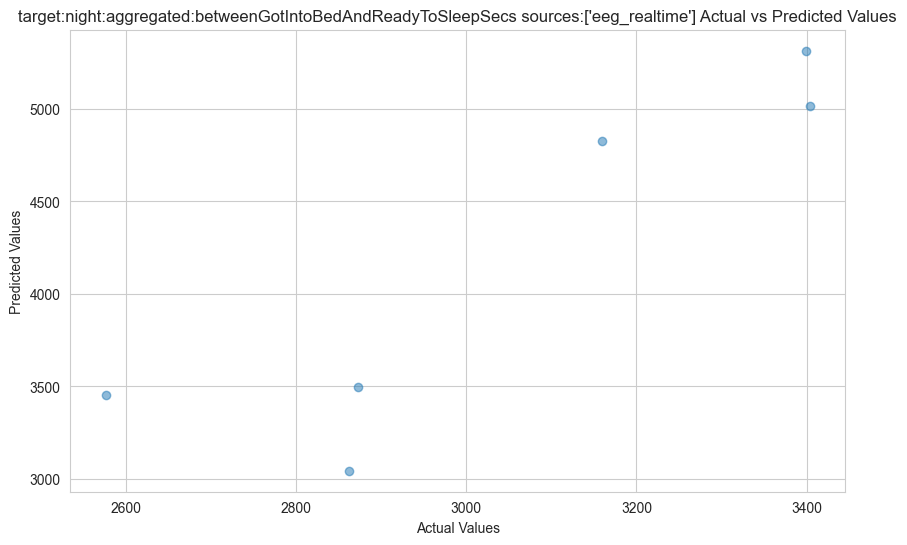

In [67]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_model(md: ModelAndData, model, X, y):
    # Predict the target values using the trained model
    predictions = model.predict(X)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, predictions)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, predictions)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    print(f"{md.name} Mean Absolute Error (MAE): {mae}")
    print(f"{md.name} Mean Squared Error (MSE): {mse}")
    print(f"{md.name} Root Mean Squared Error (RMSE): {rmse}")

    return mae, mse, rmse

def eval2(md: ModelAndData, X_train, y_train, X_val, y_val):
    model = md.model
    print("Evaluation for model: ", md.name)
    # Evaluate the model on the training set
    print(f"{md.name} Training Set Evaluation:")
    train_mae, train_mse, train_rmse = evaluate_model(md, model, X_train, y_train)
    
    # Evaluate the model on the validation set
    print(f"{md.name} Validation Set Evaluation:")
    val_mae, val_mse, val_rmse = evaluate_model(md, model, X_val, y_val)

    
    
    # Predict the target values using the trained model
    val_predictions = model.predict(X_val)
    
    # Create a DataFrame with y_val and the predictions
    results_df = pd.DataFrame({
        'Actual': y_val,
        'Predicted': val_predictions
    })
    
    # Plot a scatter plot of y_val vs predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{md.name} Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

for md in modelsAndData:
    eval2(md, md.X_train, md.y_train, md.X_val, md.y_val)
#eval2(model_to_ready_to_sleep, X_train_to_ready_to_sleep, y_train_to_ready_to_sleep, X_val_to_ready_to_sleep, y_val_to_ready_to_sleep)

# Most useful features

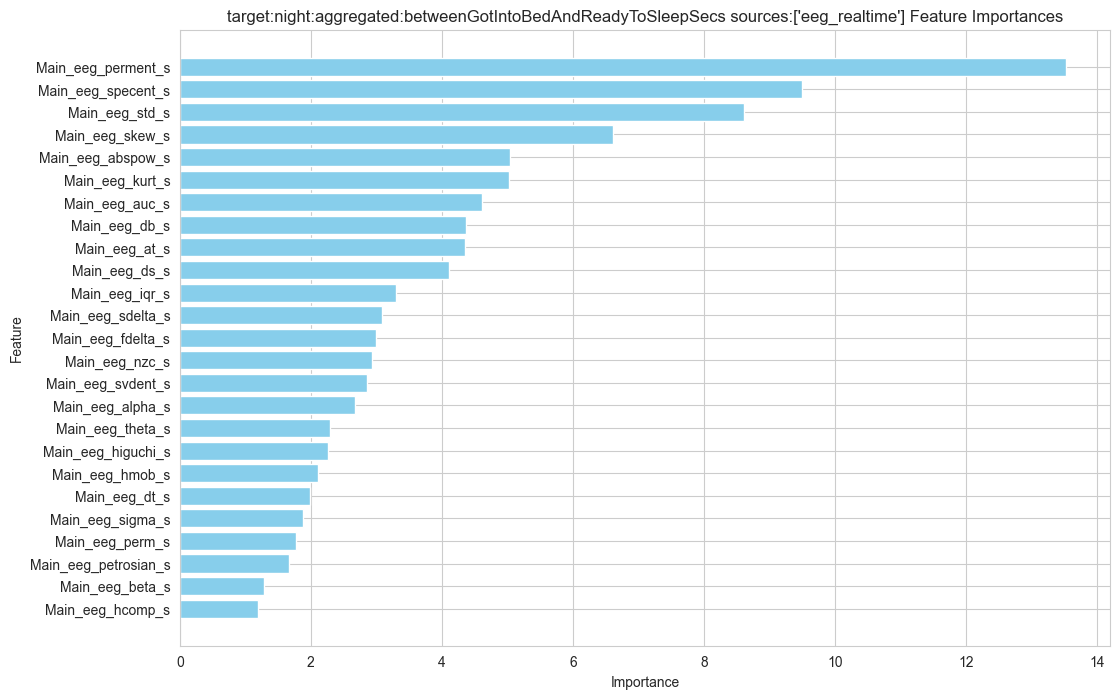

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

def importances(md: ModelAndData):
    # Get feature importances
    feature_importances = md.model.get_feature_importance()
    
    # Create a DataFrame to display the feature importances
    feature_names = md.X_train.columns
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    importance_df = importance_df[importance_df['Importance'] > 1]
    
    # Sort the DataFrame by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(md.name + ' Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
    plt.show()

for md in modelsAndData:
    importances(md)